<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##implement different SGD from scratch

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## one dimension sgd
def func_test(x):
  return x**2

def gradient_func(x):
  return 2*x

In [ ]:
## define gradient descent function
def gradient_descent(l_rate, gradient_func):
  x = -15
  x_vals = [x]

  for i in range(15):
    x -= l_rate * gradient_func(x)
    x_vals.append(x)

  return x_vals

In [ ]:
##plot
def plot_function(x_vals, func):
  x_line = np.arange(-20, 20, 0.1)
  plt.plot(x_line,  [func(x) for x in x_line])
  plt.plot(x_vals,  [func(x) for x in x_vals], "ro-")

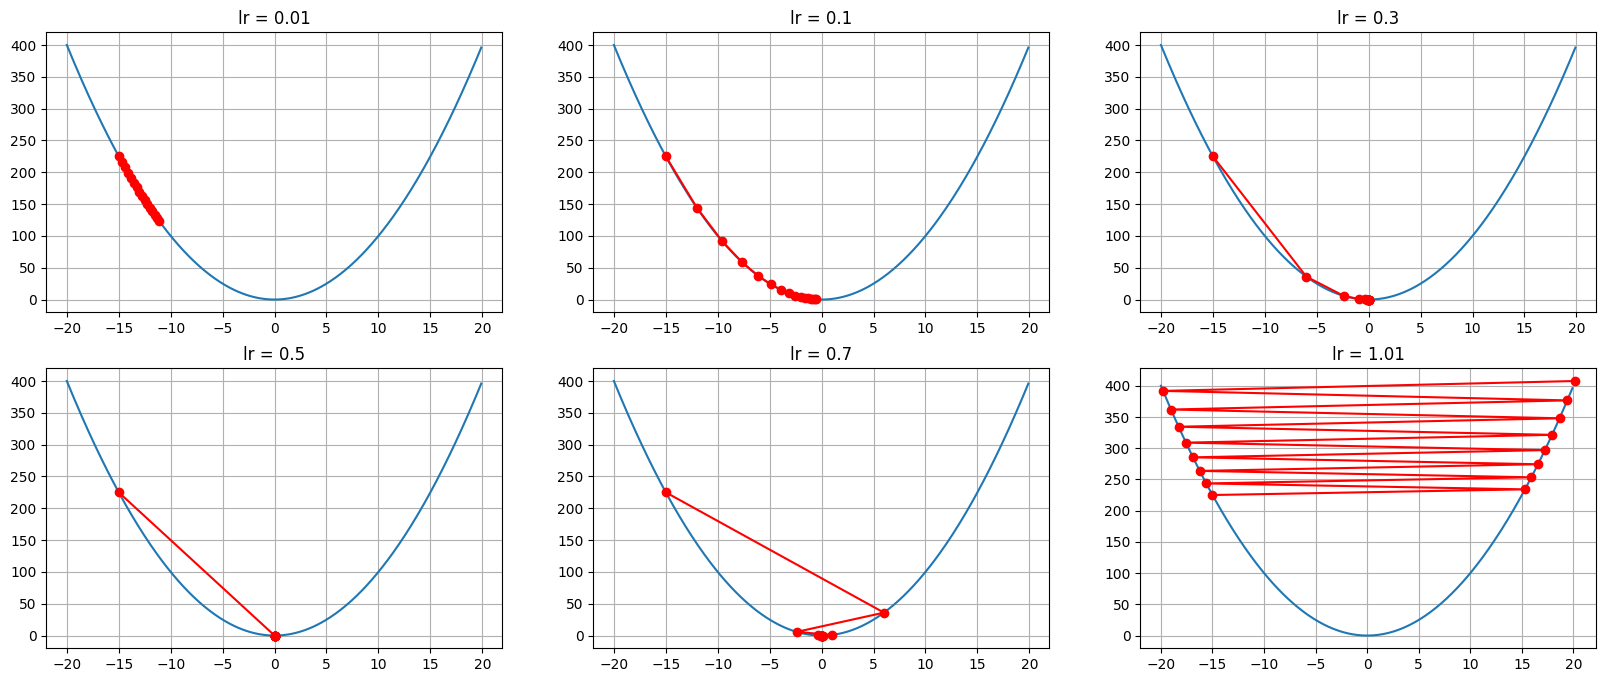

In [ ]:
# plot with various axes scales
plt.figure(figsize=(20, 8))

# lr=0.01
plt.subplot(2,3,1)
x_vals = gradient_descent(0.01, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.01')
plt.grid(True)

# lr=0.1
plt.subplot(2,3,2)
x_vals = gradient_descent(0.1, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.1')
plt.grid(True)

# lr=0.03
plt.subplot(2,3,3)
x_vals = gradient_descent(0.3, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.3')
plt.grid(True)

# lr=0.5
plt.subplot(2,3,4)
x_vals = gradient_descent(0.5, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.5')
plt.grid(True)

# lr=0.7
plt.subplot(2,3,5)
x_vals = gradient_descent(0.7, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.7')
plt.grid(True)

# lr=1
plt.subplot(2,3,6)
x_vals = gradient_descent(1.01, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 1.01')
plt.grid(True)





## 2 dimension gradient


In [18]:
def func(x1, x2):
  return x1**2 + 2*x2**2

def func_gradient(x1, x2):
  return (2*x1, 4*x2)

In [19]:
class Optimizer:
  def __init__(self, lr_type, lr_rate=0.01):
    self.lr_type = self.lr(lr_type, lr_rate)

  def lr(self, lr_type, lr_rate):
    if lr_type  == "constant":
      return self.constant_lr(lr_rate)

  def constant_lr(self, lr_rate):
    return lr_rate

  def gradient_descent(self,x1, x2, t1, t2, func_gradient):
    grad_x1, grad_x2 = func_gradient(x1, x2)
    return x1 - self.lr_type*grad_x1 , x2 - self.lr_type*grad_x2, 0 ,0

In [20]:
def search_opt(optimizer, func_gradient, iteration=20):
  x1, x2, t1, t2 = -5 , -2, 0, 0
  x_iteration = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_gradient)
    x_iteration.append((x1, x2))
  print("epoch{}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iteration

In [23]:
def search_path(func, x_iteration):
  plt.plot(*zip(*x_iteration),"-o",color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch20, x1:-0.057646075230342354, x2:-7.312316880125945e-05


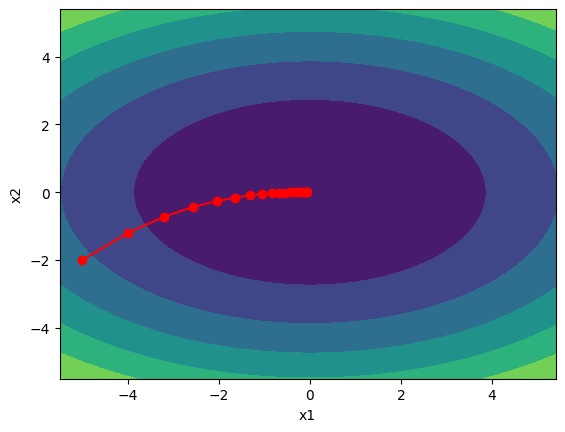

In [24]:
opt = Optimizer("constant", 0.1)
search_path(func, search_opt(opt.gradient_descent, func_gradient))